Standard library imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### 1. GETTING THE DATA READY TO BE USED WITH MACHINE LEARNING

Things that need to be done:
* splitting the data into features and labels (usually `X` and `y`)
* filling (imputing) or disregarding missing values
* converting non-numerical values to numerical values (feature encoding)

In [4]:
# Classification data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


*Features*

In [5]:
X = heart_disease.drop("target", axis=1) # columns axis
X.head() # every single column without the target one

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


*Labels*

In [6]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

*Splitting the data into training and test sets*, as one of the fundemental Machine Learning principles dictates, that *models cannot be evaluated or tested with using the data they have learned from!*
<br /> Usually total samples are divided between 80% as a training data and 20% as testing data.

In [8]:
from sklearn.model_selection import train_test_split 

# Imported module returns 4 different values listed below
# Deciding that the test data set is 20% of the overall data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

13 different features, 303 total samples, 80% of those (242) are the training set for the ML model, other 20% (61) are test set

In [9]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((303, 13), (242, 13), (61, 13), (242,), (61,))

*Making sure all data is numerical: on car_sales file*

In [12]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [13]:
len(car_sales)

1000

In [14]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

*Since we are trying to predict the price of the car, considering all other factors, splitting the data to X (Make, Colour, Odometer and Doors) and y (Price) makes sense*

In [15]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

*Splitting into training and test sets*

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Building the machine learning model*

In [18]:
from sklearn.ensemble import RandomForestRegressor 
# Regressor works the same as classifier, but since we are trying to predict a number, Regressor must be used

# Setting it up
model = RandomForestRegressor()
model.fit(X_train, y_train) # machine will learn the patterns between X and y on the training data
model.score(X_test, y_test) # later the model will be evaluated/scored on test data

ValueError: could not convert string to float: 'Toyota'

*The above ML model failed*

Since ML model cannot deal with string categories (Make, Colour and Doors), they must be converted into numerical values using one_hot_encoder

OneHotEncoder: a new binary variable is added for each unique integer value <br />
In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

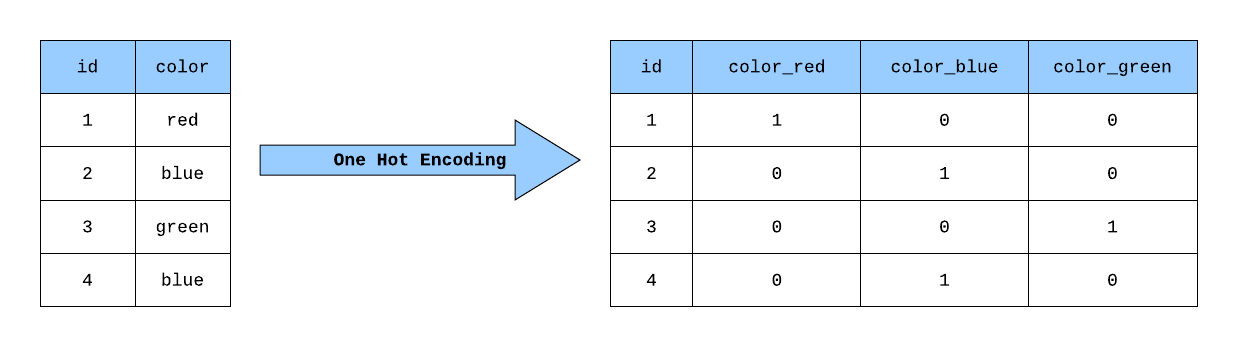

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the categories that are not numerical
categorical_features = ["Make", "Colour", "Doors"]

# Instantiating an OneHotEncoder
one_hot = OneHotEncoder() 

# Accepts a list of tupples (name, created variable, list of features we want to transform and remainder)
# ColumnTransformer applies OneHotEncoder to the categorical_features,
# and for the remainder of the columns passthrough (ignore them)
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough") 

# X data, converted into numerical values
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

*Transforming transformed_X into DataFrame for easier visualisation*

In [24]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


*Another way of transforming categorical values*

In [26]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


*Refitting the ML model*

In [27]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

*Since all data is numerical, testing it is now possible. <br />
Not a good score though, since car price is not defined only by doors, colour and make.*

In [29]:
model.score(X_test, y_test)

0.3235867221569877

##### Missing values 
Two ways of dealing with missing data:
* Fill them with some value (imputation of the data)
* Remove the samples with missing data altogether

In [30]:
# Importing car_sales with missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


*How many missing values there are in the file*

In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

*Since we know some values are missing, we can remove them: <br />*
##### 1st option for removing NaN: Filling the missing data with Pandas

In [34]:
# Filling the "Make" column 
car_sales_missing["Make"].fillna("missing", inplace=True)

# Filling the "Colour" column 
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Filling the "Odometer (KM)" column: replacing NaN with mean of all Odometer values
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].
                                          mean(), inplace=True)

# Filling the "Doors" column with average number of doors, whic is 4
car_sales_missing["Doors"].fillna(4, inplace=True)

*Removing the rows with missing labels (`Price` values), since those are not useful in ML model, trying to predict car price*

In [40]:
car_sales_missing.dropna(inplace=True) # simply removing rows with no data

In [42]:
# Checking if all missing values were removed
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
len(car_sales_missing)

950

*Although 50 samples were lost, the data is now more suitable for ML model*

*Resplitting the data: creating a new X and y*

In [48]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

*Converting data to numeric values*

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the categories that are not numerical
categorical_features = ["Make", "Colour", "Doors"]

# Instantiating an OneHotEncoder
one_hot = OneHotEncoder() 

# Accepts a list of tupples (name, created variable, list of features we want to transform and remainder)
# ColumnTransformer applies OneHotEncoder to the categorical_features,
# and for the remainder of the columns passthrough (ignore them)
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough") 

# X data, converted into numerical values
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [51]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


##### 2nd option for removing NaN: Filling missing values with SciKit-Learn

In [3]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

*Removing the rows that do not have values in `Price` column*

In [5]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

*Splitting data into X (features) and y (labels) & into train and test sets*

In [13]:
from sklearn.model_selection import train_test_split 

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

*Filling the missing values (imputing) with SciKit-Learn <br />
Filling categorical values with a string "missing" & numerical values with mean*

In [15]:
categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

*Defining columns*

In [16]:
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_features = ["Odometer (KM)"]

*Creating/defining an imputer (something that fills missing data) <br />
For example: a categorical_imputer will work on categorical_features*

In [17]:
imputer = ColumnTransformer([
    ("categorical_imputer", categorical_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("numerical_imputer", numerical_imputer, numerical_features)
])

*Transforming the data: fitting the train and test values separately and checking X_train*

In [18]:
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

*Getting both transformed data arrays back into DataFrames*

In [21]:
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

*No missing values left in the training set: SimpleImputer and ColumnTranformer were used to fill the missing values with preset defined ones*

In [22]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

*Turning the categories into numerical values*

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder() 
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough") 

*Filling the training and testing values separately*

In [24]:
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

*Checking transformed and filled X_train*

In [25]:
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

*With transformed X, now fitting the model, since data is numerical and filled (no missing values)*

In [27]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

*Using transformed - filled and one-hot encoded X data for scoring the model*

In [28]:
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

##### 2. CHOOSING THE RIGHT ESTIMATOR FOR THE PROBLEM

Things to note:
* Sklearn refers to machine learning models and algorithms as estimators
* Classification problem - predicting a category 
<br />(`clf` - short for classifier, used as a classification estimator)
* regression problem - predicting a number
<br /> <br />
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: <br /> https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

##### *2.1 Picking a machine learning model for a regression problem*

*Using the California Housing dataset <br /> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html*

In [17]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

*Turning the data into DataFrame and adding features*

In [30]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


*Adding a target we are trying to predict: the median house value for California districts, expressed in hundreds of thousands of dollars - 100.000$ (`MedHouseVal`)*

In [31]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


*Importing train_test_split and the algorithm/estimator & setting random seed*

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split 
np.random.seed(42)

*Creating the data, splitting it into training and test sets*

In [21]:
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KeyError: "['target'] not found in axis"

*Instantiating and fitting the model (on the training set)*

In [41]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

*Checking the score of the model (on the test set) <br />
Returns R^2 - the coefficient of determination of the prediction*

In [42]:
model.score(X_test, y_test)

0.5758549611440128

*If Ridge does not work or the score does not fit our needs (could be improved), ensemble model can be used - an ensemble is combination of smaller models to try and make better predictions than a single model
<br /> Sklearn ensemble models: https://scikit-learn.org/stable/modules/ensemble.html*

*Importing train_test_split, numpy and the RandomForestRegressor model class from the ensemble module & setting up random seed*

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

*Creating the data and splitting it into train and test sets*

In [17]:
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Creating random forest model and checking the score of the model (on the test set)*

In [18]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8066196804802649

##### 2.2 Picking a machine learning model for a classification problem

*Importing the data*

In [21]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


*https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html <br />
Consulting the map and it says to try LinearSVC (along with SVC and NuSVC, this is a class capable of performing multi-class classification on a dataset*

*Importing the LinearSVC estimator class and setting up the random seed*

In [24]:
from sklearn.svm import LinearSVC
np.random.seed(42)

*Creating and splitting the data*

In [22]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Instantiating and evaluating LinearSVC*

In [25]:
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/Users/emacampa/Desktop/programming/data-science/first-env/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5737704918032787

*Since this is a binary classification problem (does someone have heart disease or not), the score is quite low (simmilar to coin toss), therefore from LinearSCV we go forward to `Ensamble Classifiers` (known for its robustness and the ability to find patterns)*

*Importing the RandomForestClassifier estimator class, setting up random seed, creating and splitting the data*

In [27]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Instantiating and evaluating Random Forest Classifier*

In [28]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

Tidbit: <br />
* If you have structured data (tables of data), use ensemble methods
* If you have unstructured data (images), use deep learning or transfer learning

##### *3. FITTING THE MODEL/ALGORITHM ON OUR DATA AND USING IT TO MAKE PREDICTIONS*

##### 3.1. Fitting the model to the data
Different names for:

X = features, features variables, data <br />
y = labels, targets, target variables

*Importing the RandomForestClassifier estimator class, setting up random seed, creating & splitting the data*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Instantiating Random Forest Classifier, fitting the model to the data (training the machine learning model) & evaluating the Classifier (using the patterns the model has learned) <br /> <br />
Machine learning model takes some data, find patterns and figures out how those patterns relate to the labels*

In [30]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [32]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

*Random Forest model deep dive <br />
Resources for better understanding of the Random Forest models:*
* Random Forest Wikipedia
* Random Forest Wikipedia (simple version)
* Random Forests in Python by yhat
* An Implementation and Explanation of the Random Forest in Python by Will Koehrsen

##### 3.2 Make predictions using a machine learning model
*2 ways to make predictions:* <br />
* predict() <br />
* predict_proba()

*Using a trained model to make predictions <br />
In order for machine learning model to make prediction, it has to be passed similar data format that it has learned on*

In [34]:
clf.predict(np.array([1, 7, 8, 3, 4])) # doesn't work 

/Users/emacampa/Desktop/programming/data-science/first-env/env/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

*Making prediction on test data - labels are in the same format as test labels, so the predictions are in the same format as test labels (data is in correct shape for the trained model*

In [35]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

*Ground true labels*

In [37]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

*Creating and comparing predictions (y_preds) to truth labels to evaluate the model: the same number as `clf.score(X_test, y_test)`*

In [38]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

*Another way of doing the exact same thing: Accuracy Classification score*

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

*Making predictions with `predict_proba()` - use this if someone asks you "what's the probability your model is assigning to each prediction?" <br />
`predict_proba()` returns probabilities of a classification label*

In [40]:
clf.predict_proba(X_test[:5]) # returns an array of probability estimates

array([[0.87, 0.13],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.92, 0.08],
       [0.21, 0.79]])

*Predicting on the same data: lower array gives indexes of higher probability of the X_test data in the upper array. <br />
If `index` of the lower array `= 1`, the probability estimate (= value) on the upper array is higher on position/index 1, than at index 0; and reversed, if `index` of the lower array `= 0`, the probability estimate (= value) on the upper array is higher on position/index 0, than at index 1 <br /> 
This ML model therefore predicts, that the first sample in the given array has the probabilty of 0.89 of having heart disease (has `a 0.89 probability of the label heart_disease being 0` - has heart disease)
<br /> <br />
But instead of just returning the label, as the lower example using `clf.predict()`, the `clf.predict_proba()` also returns the probability of that label being true (labels are 0 and 1) <br /> <br />
`clf.predict()` returns a single label for each sample <br />
`clf.predict_proba()` returns the probabilities of a classification label (maximum value is 1)*

In [41]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models.

*Importing the RandomForestClassifier and RandomForestRegressor estimator class, setting up random seed, creating & splitting the data*

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Creating model instance, fitting the model to the data and making predictions*

In [11]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [12]:
y_preds[:10]

array([0.03, 0.58, 0.47, 0.13, 0.81, 0.86, 0.73, 0.03, 0.01, 0.45])

In [14]:
np.array(y_test[:10])

/var/folders/km/0g8y5_1d6hqd2czv56pqf3yr0000gn/T/ipykernel_94462/25245348.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_test[:10])


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

*Comparing the predictions to the truth: because we used `mean_absolute_error`, on average mean is the same as average - on average, each one of our models predictions is 0.32 different to the actual test value*

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.23754098360655734

##### 4. EVALUATING A MACHINE LEARNING MODEL
Three ways to evaluate Scikit-Learn models/estimators:
* Estimator's built-in score() method
* The scoring parameter
* Problem-specific metric functions

*You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html*

##### 4.1 Evaluating a model with the `score` method

*Importing the RandomForestClassifier estimator class, setting up random seed, creating & splitting the data, splitting the data, Instantiating Random Forest Classifier and fitting the model to the data*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

*The highest value for the `score()` method is 1.0, the lowest is 0.0 <br/>
The ML model achieved the perfect score on the training data (it learned the patterns in the existing data) <br />
The train `score()` will always be higher than the test *

In [38]:
clf.score(X_train, y_train)

1.0

In [40]:
clf.score(X_test, y_test)

0.8688524590163934

*Using `score()` on our regression problem ...*

*Creating and splitting the data & creating model instance*

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
np.random.seed(42)

housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

*The default `score()` evaluation metric is r_squared for regression algorithms
<br /> Highest = 1.0, lowest = 0.0*

In [7]:
model.score(X_test, y_test)

0.8066196804802649

##### 4.2 Evaluating a model using the `scoring` parameter

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

np.random.seed(42)

heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [15]:
clf.score(X_test, y_test)

0.8688524590163934

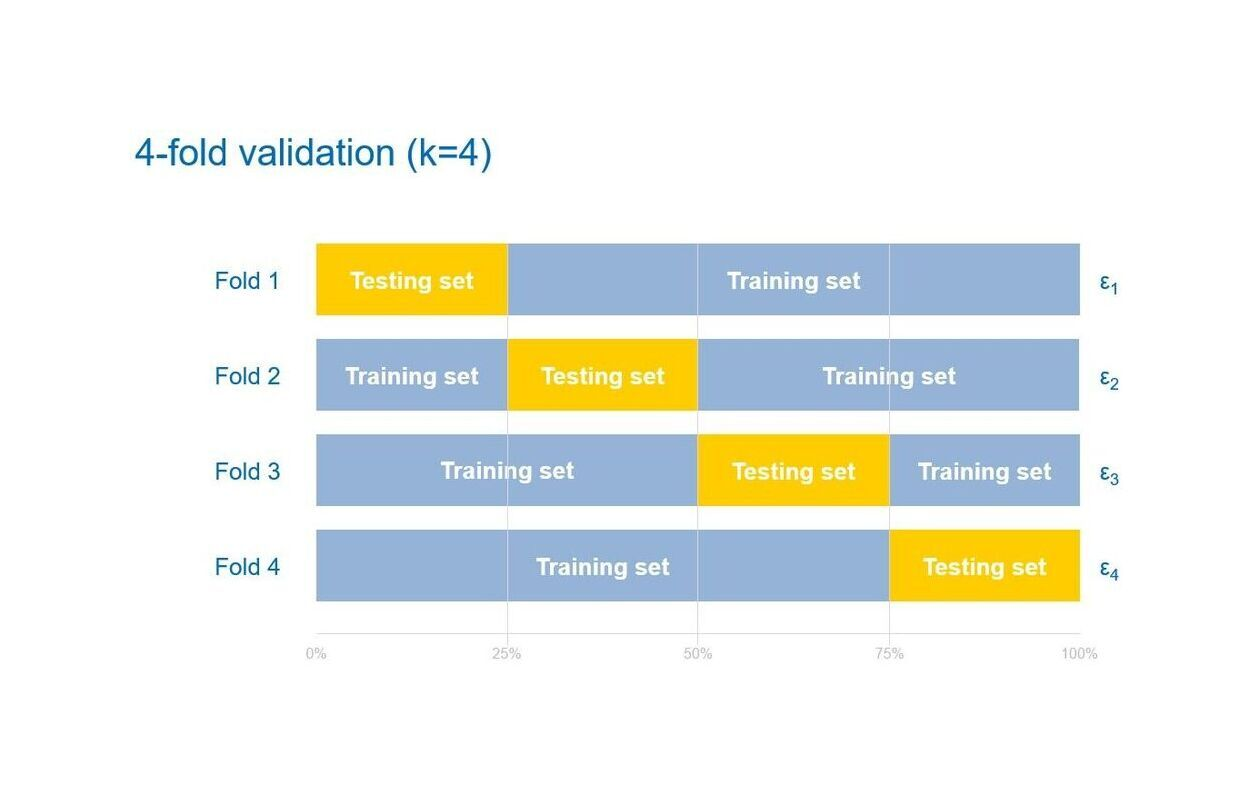

*`cross_validation` returns an array <br />
5-fold Cross-validation means, that the model does 5 different splits; the model is trained on 5 different versions of training data, and evaluated on 5 different versions of the test data*

In [16]:
cross_val_score(clf, X, y, cv=5) # cv means "fold"

array([0.83606557, 0.90163934, 0.81967213, 0.8       , 0.78333333])

*Create single training and test split score with cross validation and calculating the mean of all 5 models & comparing the two: although the accuracy of mean is lower, its preferrable*

In [19]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8215300546448088)

*Default scoring parameter of classifier = mean accuracy = `clf.score()`
<br /> Scoring parameter set to None by default*

In [20]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.76666667])